In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score


In [34]:
path = '/content/drive/MyDrive/Đồ án 2/pima-indians-diabetes.csv'
file = pd.read_csv(path, )

In [35]:
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.05, 'Correlation of Diapete Features')

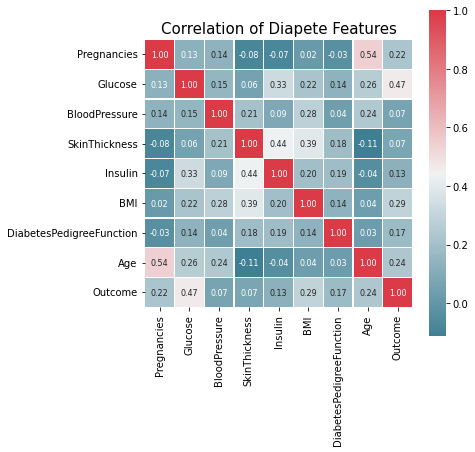

In [36]:
corr = file.iloc[:,:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize = (6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Diapete Features', y=1.05, size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


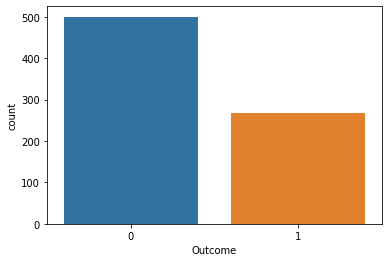

In [37]:
sns.countplot(file['Outcome'], label = "Count")

In [38]:
outcome1 = file[file['Outcome'] == 1]
outcome0 = file[file['Outcome'] == 0]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

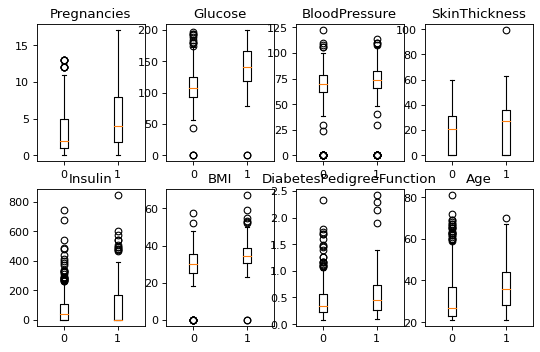

In [39]:
figure(figsize=(8, 5), dpi=80)

plt.subplot(2,4,1)
plt.boxplot([outcome0["Pregnancies"], outcome1["Pregnancies"]], labels =[0,1], showfliers = True)
plt.title("Pregnancies")

plt.subplot(2,4,2)
plt.boxplot([outcome0["Glucose"], outcome1["Glucose"]], labels =[0,1], showfliers = True)
plt.title("Glucose")


plt.subplot(2,4,3)
plt.boxplot([outcome0["BloodPressure"], outcome1["BloodPressure"]], labels =[0,1], showfliers = True)
plt.title("BloodPressure")

plt.subplot(2,4,4)
plt.boxplot([outcome0["SkinThickness"], outcome1["SkinThickness"]], labels =[0,1], showfliers = True)
plt.title("SkinThickness")

plt.subplot(2,4,5)
plt.boxplot([outcome0["Insulin"], outcome1["Insulin"]], labels =[0,1], showfliers = True)
plt.title("Insulin")

plt.subplot(2,4,6)
plt.boxplot([outcome0["BMI"], outcome1["BMI"]], labels =[0,1], showfliers = True)
plt.title("BMI")

plt.subplot(2,4,7)
plt.boxplot([outcome0["DiabetesPedigreeFunction"], outcome1["DiabetesPedigreeFunction"]], labels =[0,1], showfliers = True)
plt.title("DiabetesPedigreeFunction")

plt.subplot(2,4,8)
plt.boxplot([outcome0["Age"], outcome1["Age"]], labels =[0,1], showfliers = True)
plt.title("Age")

plt.show()

In [40]:
file.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
del_cols = ['SkinThickness', 'Insulin']
mean_glu, mean_Blood, mean_BMI = file[['Glucose', 'BloodPressure', 'BMI']].mean()
#print(mean_glu, mean_Blood, mean_BMI)
file['Glucose'].replace(0, mean_glu)
file['BloodPressure'].replace(0, mean_Blood)
file['BMI'].replace(0, mean_BMI)
 #delete columns with miss a lot of values
X = file.drop(del_cols, axis = 1)
#from sklearn.preprocessing import StandardScaler
#scale =  StandardScaler()
#scaled_data = scaler.fit_transform(X)
#X = scaled_data
#X = pd.DataFrame(X)
#export = X.to_csv(r'/content/drive/MyDrive/Đồ án 2/dataclean1.csv', index = None, header = True)
X = X.values
print(X.shape)
Y = file['Outcome']
print(Y.shape)

(768, 7)
(768,)


Scaling data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
normalized = scaler.transform(X)
X  = normalized

#scaler = StandardScaler()
#scaler.fit(X)
#standardized = scaler.transform(X)
#X  = standardized
print(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25 )

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)
print("Train:  ",dict(zip(unique, counts)))

unique, counts = np.unique(Y_test, return_counts=True)
print("Test:  ",dict(zip(unique, counts)))


1. LR

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
print(accuracy_score(LR.predict(X_train), Y_train))
print(accuracy_score(LR.predict(X_test), Y_test))
print(confusion_matrix(Y_test,LR.predict(X_test)))

2. SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc  = SVC(kernel= 'linear', C  = 100)
svc.fit(X_train, Y_train)
predictions2 = svc.predict(X_test)
print(accuracy_score(Y_test, predictions2))
print(confusion_matrix(Y_test, predictions2))

3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
predictions3 = tree.predict(X_test)
print(accuracy_score(Y_test, predictions3))
print(confusion_matrix(Y_test, predictions3))

4.Naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

In [ ]:
predictions4 = gnb.predict(X_test)
print(accuracy_score(Y_test, predictions4))
print(confusion_matrix(Y_test, predictions4))

5. KNN

In [ ]:
from sklearn import neighbors

ngh = neighbors.KNeighborsClassifier(n_neighbors = 22, p = 2, weights = 'distance')
ngh.fit(X_train, Y_train)

In [ ]:
predictions5 = ngh.predict(X_test)
print("accuracy: ",  accuracy_score(Y_test, predictions5))
print(confusion_matrix(Y_test, predictions5))

6. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier(n_jobs=-1,random_state=123)
reg.fit(X_train, Y_train)
predictions6 = reg.predict(X_test)
#print(predictions6)
print("accuracy: ",  accuracy_score(Y_test, predictions6))
print(confusion_matrix(Y_test, predictions6))

7. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

svc = SVC(probability=True, kernel='linear')

abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

abc.fit(X_train, Y_train)

predictions7 = abc.predict(X_test)
print("accuracy: ",  accuracy_score(Y_test, predictions7))
print(confusion_matrix(Y_test, predictions7))

8. XGB

In [ ]:
import xgboost as xgb
XGB = xgb.XGBClassifier(objective='binary:logistic',booster = 'gbtree', colsample_bylever = 0.8, colsample_bytree=1,learning_rate = 0.025, 
                        max_depth = 7, min_child_weight = 11, scale_pos_weight=1,n_estimators = 150, random_state = 1, seed = 1,  eta=0.3, subsample= 0.8)
XGB.fit(X_train,Y_train)
print("training set")
#print(mean_squared_error(Y_train, XGB.predict(X_train), squared= False))
print(accuracy_score(Y_train, XGB.predict(X_train)))
print(confusion_matrix(Y_train, XGB.predict(X_train)))

print("testing set")
#print(mean_squared_error(Y_test, XGB.predict(X_test), squared= False))
print(accuracy_score(Y_test, XGB.predict(X_test)))
print(confusion_matrix(Y_test, XGB.predict(X_test)))

9. ANN

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = X.shape[1], activation='relu', kernel_initializer= 'normal'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='mean_squared_error', optimizer= 'adam')
# fit model
model.fit(X_train, Y_train, batch_size = 5, epochs= 50, verbose = 0 )
raw_output = model.predict(X_test)
predict = []
for y in raw_output:
  if y[0] > 0.5:
    predict.append(1)
  else:
    predict.append(0)

In [ ]:
print(accuracy_score(Y_test, predict))
print(confusion_matrix(Y_test, predict))